# Index Tracking and Forward Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [5]:
dji_all = pd.read_csv('dji_prices.csv', parse_dates = ['Date'], index_col = 'Date')
dji_all

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.97,60.36,89.17,61.16,27.73,70.97,33.74,nan,200.72,41.07,97.27,20.35,66.40,48.07,24.29,43.87,78.26,44.02,29.86,12.21,26.29,64.54,39.53,53.55,52.57,nan,35.31,46.07,47.55,74.11
2007-01-04,12.24,59.92,89.53,61.00,28.46,70.28,34.00,nan,198.85,40.57,98.31,21.17,67.23,48.19,24.30,43.54,77.95,45.11,29.81,12.33,26.38,64.05,39.57,53.10,52.91,nan,35.50,46.16,47.78,72.72
2007-01-05,12.15,59.13,89.15,60.22,28.47,70.55,33.73,nan,199.05,39.79,97.42,21.10,66.62,47.79,24.13,43.54,77.42,44.30,29.64,12.35,26.30,63.50,39.45,52.41,52.55,nan,34.90,45.50,47.39,73.24
2007-01-08,12.21,59.69,88.94,60.29,28.63,71.45,34.03,nan,203.73,39.49,98.90,21.01,66.51,47.95,24.28,43.71,77.59,44.29,29.93,12.32,26.16,63.64,39.77,52.02,53.32,nan,34.36,45.69,47.00,72.65
2007-01-09,13.22,59.31,88.00,60.62,28.47,70.63,33.98,nan,204.08,39.32,100.07,21.03,66.26,47.75,24.31,43.79,77.68,43.88,29.96,12.47,26.17,63.48,39.31,51.89,52.68,nan,34.50,45.93,47.39,72.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,246.88,84.05,127.68,101.34,38.60,66.55,98.12,28.47,153.60,184.72,105.48,52.40,119.18,88.43,39.45,161.95,132.72,69.05,148.34,72.33,29.70,103.27,54.60,93.74,219.80,154.53,49.99,45.25,115.03,35.44
2020-03-25,245.52,90.17,158.73,104.67,37.67,69.27,100.73,30.38,155.13,181.76,105.85,51.26,119.40,91.73,41.61,162.98,131.54,68.22,146.92,79.01,29.75,100.92,60.53,92.18,234.49,161.78,49.94,41.44,109.40,37.29
2020-03-26,258.44,93.29,180.55,110.50,40.58,76.38,105.36,29.68,165.79,195.21,112.89,55.54,126.57,98.12,44.29,167.35,136.18,73.53,156.11,84.30,31.75,107.38,65.85,98.67,255.39,168.88,53.54,45.67,109.82,38.82


In [6]:
dji_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     260 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [9]:
dji = pd.read_csv('dji.csv', parse_dates = ['Date'], index_col = 'Date')
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.54,12580.35,12404.82,12474.52,12474.52,327200000
2007-01-04,12473.16,12510.41,12403.86,12480.69,12480.69,259060000
2007-01-05,12480.05,12480.13,12365.41,12398.01,12398.01,235220000
2007-01-08,12392.01,12445.92,12337.37,12423.49,12423.49,223500000
2007-01-09,12424.77,12466.43,12369.17,12416.60,12416.60,225190000
...,...,...,...,...,...,...
2020-03-24,19722.19,20737.70,19649.25,20704.91,20704.91,799340000
2020-03-25,21050.34,22019.93,20538.34,21200.55,21200.55,796320000
2020-03-26,21468.38,22595.06,21427.10,22552.17,22552.17,705180000


In [10]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [11]:
# since we are only interested in close column
dji = dji.Close.to_frame()
dji

,Close
Date,
2007-01-03,12474.52
2007-01-04,12480.69
2007-01-05,12398.01
2007-01-08,12423.49
2007-01-09,12416.60
...,...
2020-03-24,20704.91
2020-03-25,21200.55
2020-03-26,22552.17


In [12]:
df = pd.concat([dji_all, dji], axis = 1)
df

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.97,60.36,89.17,61.16,27.73,70.97,33.74,nan,200.72,41.07,97.27,20.35,66.40,48.07,24.29,...,78.26,44.02,29.86,12.21,26.29,64.54,39.53,53.55,52.57,nan,35.31,46.07,47.55,74.11,12474.52
2007-01-04,12.24,59.92,89.53,61.00,28.46,70.28,34.00,nan,198.85,40.57,98.31,21.17,67.23,48.19,24.30,...,77.95,45.11,29.81,12.33,26.38,64.05,39.57,53.10,52.91,nan,35.50,46.16,47.78,72.72,12480.69
2007-01-05,12.15,59.13,89.15,60.22,28.47,70.55,33.73,nan,199.05,39.79,97.42,21.10,66.62,47.79,24.13,...,77.42,44.30,29.64,12.35,26.30,63.50,39.45,52.41,52.55,nan,34.90,45.50,47.39,73.24,12398.01
2007-01-08,12.21,59.69,88.94,60.29,28.63,71.45,34.03,nan,203.73,39.49,98.90,21.01,66.51,47.95,24.28,...,77.59,44.29,29.93,12.32,26.16,63.64,39.77,52.02,53.32,nan,34.36,45.69,47.00,72.65,12423.49
2007-01-09,13.22,59.31,88.00,60.62,28.47,70.63,33.98,nan,204.08,39.32,100.07,21.03,66.26,47.75,24.31,...,77.68,43.88,29.96,12.47,26.17,63.48,39.31,51.89,52.68,nan,34.50,45.93,47.39,72.09,12416.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,246.88,84.05,127.68,101.34,38.60,66.55,98.12,28.47,153.60,184.72,105.48,52.40,119.18,88.43,39.45,...,132.72,69.05,148.34,72.33,29.70,103.27,54.60,93.74,219.80,154.53,49.99,45.25,115.03,35.44,20704.91
2020-03-25,245.52,90.17,158.73,104.67,37.67,69.27,100.73,30.38,155.13,181.76,105.85,51.26,119.40,91.73,41.61,...,131.54,68.22,146.92,79.01,29.75,100.92,60.53,92.18,234.49,161.78,49.94,41.44,109.40,37.29,21200.55
2020-03-26,258.44,93.29,180.55,110.50,40.58,76.38,105.36,29.68,165.79,195.21,112.89,55.54,126.57,98.12,44.29,...,136.18,73.53,156.11,84.30,31.75,107.38,65.85,98.67,255.39,168.88,53.54,45.67,109.82,38.82,22552.17


In [13]:
df.rename(columns = {'Close':'DJI'}, inplace = True)
df

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.97,60.36,89.17,61.16,27.73,70.97,33.74,nan,200.72,41.07,97.27,20.35,66.40,48.07,24.29,...,78.26,44.02,29.86,12.21,26.29,64.54,39.53,53.55,52.57,nan,35.31,46.07,47.55,74.11,12474.52
2007-01-04,12.24,59.92,89.53,61.00,28.46,70.28,34.00,nan,198.85,40.57,98.31,21.17,67.23,48.19,24.30,...,77.95,45.11,29.81,12.33,26.38,64.05,39.57,53.10,52.91,nan,35.50,46.16,47.78,72.72,12480.69
2007-01-05,12.15,59.13,89.15,60.22,28.47,70.55,33.73,nan,199.05,39.79,97.42,21.10,66.62,47.79,24.13,...,77.42,44.30,29.64,12.35,26.30,63.50,39.45,52.41,52.55,nan,34.90,45.50,47.39,73.24,12398.01
2007-01-08,12.21,59.69,88.94,60.29,28.63,71.45,34.03,nan,203.73,39.49,98.90,21.01,66.51,47.95,24.28,...,77.59,44.29,29.93,12.32,26.16,63.64,39.77,52.02,53.32,nan,34.36,45.69,47.00,72.65,12423.49
2007-01-09,13.22,59.31,88.00,60.62,28.47,70.63,33.98,nan,204.08,39.32,100.07,21.03,66.26,47.75,24.31,...,77.68,43.88,29.96,12.47,26.17,63.48,39.31,51.89,52.68,nan,34.50,45.93,47.39,72.09,12416.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,246.88,84.05,127.68,101.34,38.60,66.55,98.12,28.47,153.60,184.72,105.48,52.40,119.18,88.43,39.45,...,132.72,69.05,148.34,72.33,29.70,103.27,54.60,93.74,219.80,154.53,49.99,45.25,115.03,35.44,20704.91
2020-03-25,245.52,90.17,158.73,104.67,37.67,69.27,100.73,30.38,155.13,181.76,105.85,51.26,119.40,91.73,41.61,...,131.54,68.22,146.92,79.01,29.75,100.92,60.53,92.18,234.49,161.78,49.94,41.44,109.40,37.29,21200.55
2020-03-26,258.44,93.29,180.55,110.50,40.58,76.38,105.36,29.68,165.79,195.21,112.89,55.54,126.57,98.12,44.29,...,136.18,73.53,156.11,84.30,31.75,107.38,65.85,98.67,255.39,168.88,53.54,45.67,109.82,38.82,22552.17


In [14]:
more_info = pd.read_csv('dow_j.csv')
more_info

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,NYSE: MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,NYSE: AXP,Financial services,1982-08-30,AXP
2,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
3,Boeing,NYSE,NYSE: BA,Aerospace and defense,1987-03-12,BA
4,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining,1991-05-06,CAT
5,Chevron Corporation,NYSE,NYSE: CVX,Petroleum industry,2008-02-19,CVX
6,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,CSCO
7,The Coca-Cola Company,NYSE,NYSE: KO,Food industry,1987-03-12,KO
8,Dow Inc.,NYSE,NYSE: DOW,Chemical industry,2019-04-02,DOW
9,ExxonMobil,NYSE,NYSE: XOM,Petroleum industry,1928-10-01,XOM


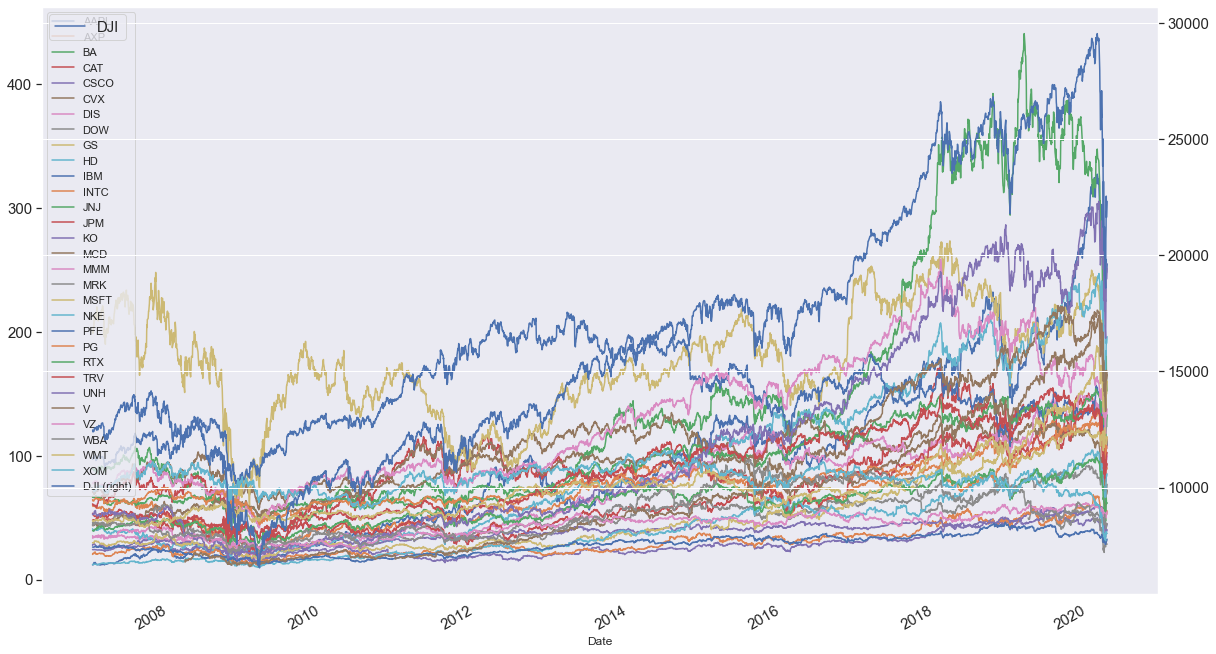

In [16]:
sns.set()
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = 'DJI')
plt.legend(fontsize = 15)
plt.show()

# DJI is way above all the other curves

In [21]:
# Turning the df into a normalized df, as it is easier to visualize the returns in this form

norm = df.div(df.iloc[0]).mul(100)
norm


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,100.00,100.00,100.00,100.00,100.00,100.00,100.00,nan,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,nan,100.00,100.00,100.00,100.00,100.00
2007-01-04,102.22,99.27,100.40,99.74,102.63,99.03,100.79,nan,99.07,98.78,101.07,104.03,101.25,100.25,100.04,...,99.60,102.48,99.83,101.02,100.34,99.24,100.10,99.16,100.65,nan,100.56,100.20,100.48,98.12,100.05
2007-01-05,101.49,97.96,99.98,98.46,102.67,99.41,99.97,nan,99.17,96.88,100.15,103.69,100.33,99.42,99.34,...,98.93,100.64,99.26,101.19,100.04,98.39,99.79,97.87,99.96,nan,98.84,98.76,99.66,98.83,99.39
2007-01-08,101.99,98.89,99.74,98.58,103.25,100.68,100.88,nan,101.50,96.15,101.68,103.24,100.17,99.75,99.98,...,99.14,100.61,100.23,100.88,99.51,98.61,100.61,97.14,101.43,nan,97.33,99.18,98.84,98.03,99.59
2007-01-09,110.47,98.26,98.69,99.12,102.67,99.52,100.73,nan,101.67,95.74,102.88,103.34,99.79,99.33,100.06,...,99.26,99.68,100.33,102.14,99.54,98.36,99.46,96.90,100.21,nan,97.73,99.70,99.66,97.27,99.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,2062.24,139.25,143.19,165.70,139.20,93.77,290.83,nan,76.52,449.77,108.44,257.49,179.49,183.96,162.41,...,169.59,156.86,496.78,592.44,112.97,160.01,138.13,175.05,418.11,nan,141.59,98.22,241.91,47.82,165.98
2020-03-25,2050.88,149.39,178.01,171.14,135.85,97.60,298.56,nan,77.29,442.56,108.82,251.89,179.82,190.83,171.31,...,168.08,154.98,492.03,647.16,113.16,156.37,153.14,172.14,446.05,nan,141.45,89.95,230.07,50.32,169.95
2020-03-26,2158.81,154.56,202.48,180.67,146.34,107.62,312.29,nan,82.60,475.31,116.06,272.92,190.62,204.12,182.34,...,174.01,167.04,522.81,690.49,120.77,166.38,166.60,184.26,485.81,nan,151.64,99.13,230.96,52.38,180.79


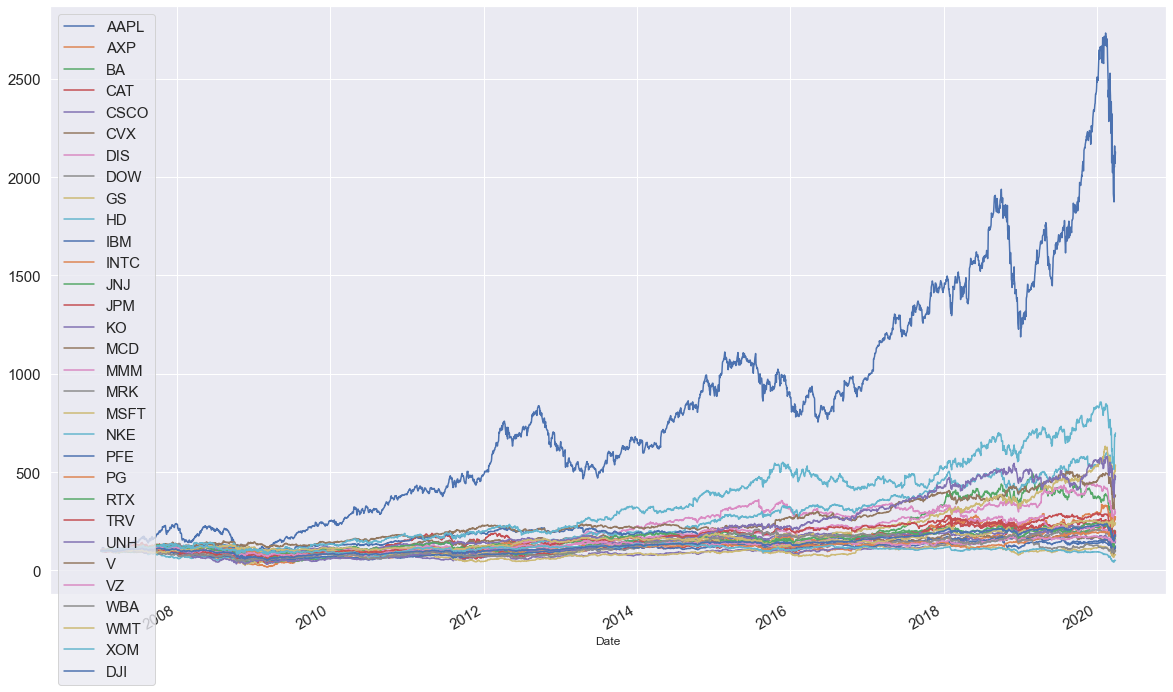

In [24]:
norm.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15, loc = 2)
plt.show()

# Apple is performing the highest

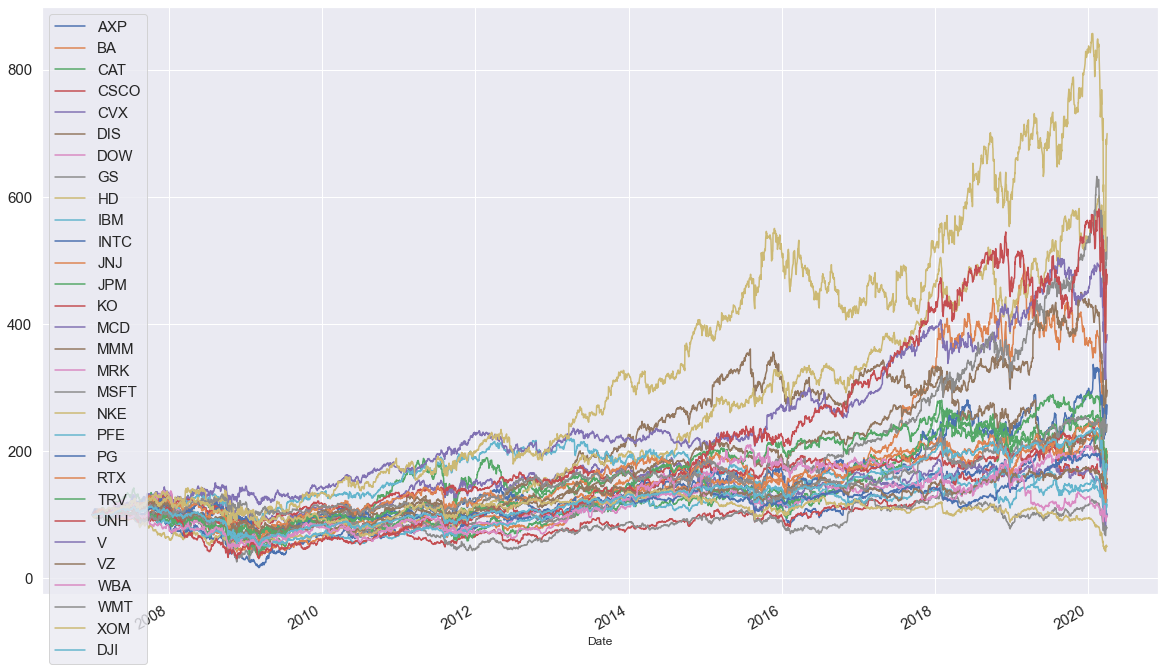

In [26]:
norm.drop(columns = 'AAPL').plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15, loc = 2)
plt.show()

# NOw AXP is the highest performing

In [27]:
# daily return
ret = df.pct_change()
ret

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-01-04,0.02,-0.01,0.00,-0.00,0.03,-0.01,0.01,nan,-0.01,-0.01,0.01,0.04,0.01,0.00,0.00,...,-0.00,0.02,-0.00,0.01,0.00,-0.01,0.00,-0.01,0.01,nan,0.01,0.00,0.00,-0.02,0.00
2007-01-05,-0.01,-0.01,-0.00,-0.01,0.00,0.00,-0.01,nan,0.00,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,...,-0.01,-0.02,-0.01,0.00,-0.00,-0.01,-0.00,-0.01,-0.01,nan,-0.02,-0.01,-0.01,0.01,-0.01
2007-01-08,0.00,0.01,-0.00,0.00,0.01,0.01,0.01,nan,0.02,-0.01,0.02,-0.00,-0.00,0.00,0.01,...,0.00,-0.00,0.01,-0.00,-0.01,0.00,0.01,-0.01,0.01,nan,-0.02,0.00,-0.01,-0.01,0.00
2007-01-09,0.08,-0.01,-0.01,0.01,-0.01,-0.01,-0.00,nan,0.00,-0.00,0.01,0.00,-0.00,-0.00,0.00,...,0.00,-0.01,0.00,0.01,0.00,-0.00,-0.01,-0.00,-0.01,nan,0.00,0.01,0.01,-0.01,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,0.10,0.22,0.21,0.10,0.12,0.23,0.14,0.07,0.14,0.14,0.11,0.06,0.07,0.12,0.05,...,0.13,0.04,0.09,0.15,0.04,0.06,0.16,0.06,0.13,0.14,-0.01,0.04,0.01,0.13,0.11
2020-03-25,-0.01,0.07,0.24,0.03,-0.02,0.04,0.03,0.07,0.01,-0.02,0.00,-0.02,0.00,0.04,0.05,...,-0.01,-0.01,-0.01,0.09,0.00,-0.02,0.11,-0.02,0.07,0.05,-0.00,-0.08,-0.05,0.05,0.02
2020-03-26,0.05,0.03,0.14,0.06,0.08,0.10,0.05,-0.02,0.07,0.07,0.07,0.08,0.06,0.07,0.06,...,0.04,0.08,0.06,0.07,0.07,0.06,0.09,0.07,0.09,0.04,0.07,0.10,0.00,0.04,0.06


In [31]:
pd.options.display.float_format = '{:.5f}'.format

ret.describe()
# mean gives an intuition for return
# std gives an intuition for risk

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,259.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,...,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3029.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,0.00112,0.00040,0.00037,0.00039,0.00029,0.00017,0.00048,-0.00156,0.00022,0.00062,0.00015,0.00049,0.00027,0.00053,0.00026,...,0.00028,0.00030,0.00066,0.00075,0.00017,0.00024,0.00026,0.00036,0.00069,0.00100,0.00022,0.00015,0.00035,-0.00008,0.00025
std,0.02028,0.02386,0.02063,0.02060,0.01873,0.01826,0.01738,0.03353,0.02418,0.01724,0.01475,0.01945,0.01124,0.02582,0.01199,...,0.01466,0.01598,0.01785,0.01801,0.01426,0.01193,0.01599,0.01825,0.02107,0.01916,0.01366,0.01783,0.01296,0.01595,0.01239
min,-0.17920,-0.17595,-0.23848,-0.14282,-0.16211,-0.22125,-0.12985,-0.21658,-0.18960,-0.19794,-0.12851,-0.18042,-0.10038,-0.20727,-0.09672,...,-0.12945,-0.14738,-0.14739,-0.11835,-0.10315,-0.08737,-0.14477,-0.20800,-0.18636,-0.13643,-0.08069,-0.14987,-0.10183,-0.13953,-0.12927
25%,-0.00788,-0.00751,-0.00861,-0.00895,-0.00730,-0.00760,-0.00684,-0.01494,-0.00963,-0.00698,-0.00646,-0.00873,-0.00446,-0.00864,-0.00503,...,-0.00571,-0.00697,-0.00743,-0.00751,-0.00637,-0.00480,-0.00649,-0.00624,-0.00808,-0.00750,-0.00651,-0.00817,-0.00557,-0.00716,-0.00394
50%,0.00099,0.00064,0.00069,0.00039,0.00044,0.00063,0.00057,0.00055,0.00026,0.00053,0.00032,0.00062,0.00023,0.00021,0.00049,...,0.00071,0.00017,0.00038,0.00069,0.00000,0.00025,0.00051,0.00067,0.00062,0.00122,0.00052,0.00010,0.00054,0.00000,0.00056
75%,0.01117,0.00935,0.00993,0.01025,0.00872,0.00835,0.00809,0.01221,0.01023,0.00816,0.00727,0.00958,0.00559,0.00934,0.00577,...,0.00701,0.00779,0.00878,0.00903,0.00707,0.00553,0.00768,0.00736,0.00928,0.00925,0.00699,0.00887,0.00633,0.00724,0.00529
max,0.13905,0.21882,0.24319,0.14723,0.15950,0.22741,0.15972,0.20909,0.26468,0.14067,0.11515,0.19521,0.12229,0.25097,0.13880,...,0.12599,0.12651,0.18605,0.15175,0.10172,0.12009,0.15757,0.25556,0.34755,0.14997,0.14632,0.16636,0.11709,0.17191,0.11365


In [32]:
def summary_ann(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns = ['mean', 'std'], inplace = True)
    return summary

In [47]:
summary = summary_ann(ret)
summary

,Return,Risk
AAPL,0.28333,0.32201
AXP,0.10175,0.37879
BA,0.09448,0.32754
CAT,0.09901,0.32700
CSCO,0.07263,0.29736
CVX,0.04325,0.28993
DIS,0.11995,0.27596
DOW,-0.39238,0.53232
GS,0.05570,0.38389
HD,0.15573,0.27373


In [48]:
# since the company names are not apparent from its ticker symbols, we need to join it with our more_info dataframe

summary = summary.merge(more_info.loc[:, ['Ticker', 'Company']], how = 'left', left_index = True, right_on = 'Ticker')

In [49]:
summary.set_index('Company', inplace = True)
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.28333,0.32201,AAPL
American Express,0.10175,0.37879,AXP
Boeing,0.09448,0.32754,BA
Caterpillar Inc.,0.09901,0.32700,CAT
Cisco Systems,0.07263,0.29736,CSCO
Chevron Corporation,0.04325,0.28993,CVX
The Walt Disney Company,0.11995,0.27596,DIS
Dow Inc.,-0.39238,0.53232,DOW
Goldman Sachs,0.05570,0.38389,GS


In [50]:
summary.rename(index = {np.nan: 'Dow Jones'}, inplace = True)

In [51]:
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.28333,0.32201,AAPL
American Express,0.10175,0.37879,AXP
Boeing,0.09448,0.32754,BA
Caterpillar Inc.,0.09901,0.32700,CAT
Cisco Systems,0.07263,0.29736,CSCO
Chevron Corporation,0.04325,0.28993,CVX
The Walt Disney Company,0.11995,0.27596,DIS
Dow Inc.,-0.39238,0.53232,DOW
Goldman Sachs,0.05570,0.38389,GS


## Exploratory data analysis (Risk, Return, Correlation) 

In [53]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     259 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [62]:
# since 'DOW' does not have man values we drop it

summary2 = summary.drop(index = "Dow Inc.")
summary2

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.28333,0.32201,AAPL
American Express,0.10175,0.37879,AXP
Boeing,0.09448,0.32754,BA
Caterpillar Inc.,0.09901,0.32700,CAT
Cisco Systems,0.07263,0.29736,CSCO
Chevron Corporation,0.04325,0.28993,CVX
The Walt Disney Company,0.11995,0.27596,DIS
Goldman Sachs,0.05570,0.38389,GS
The Home Depot,0.15573,0.27373,HD


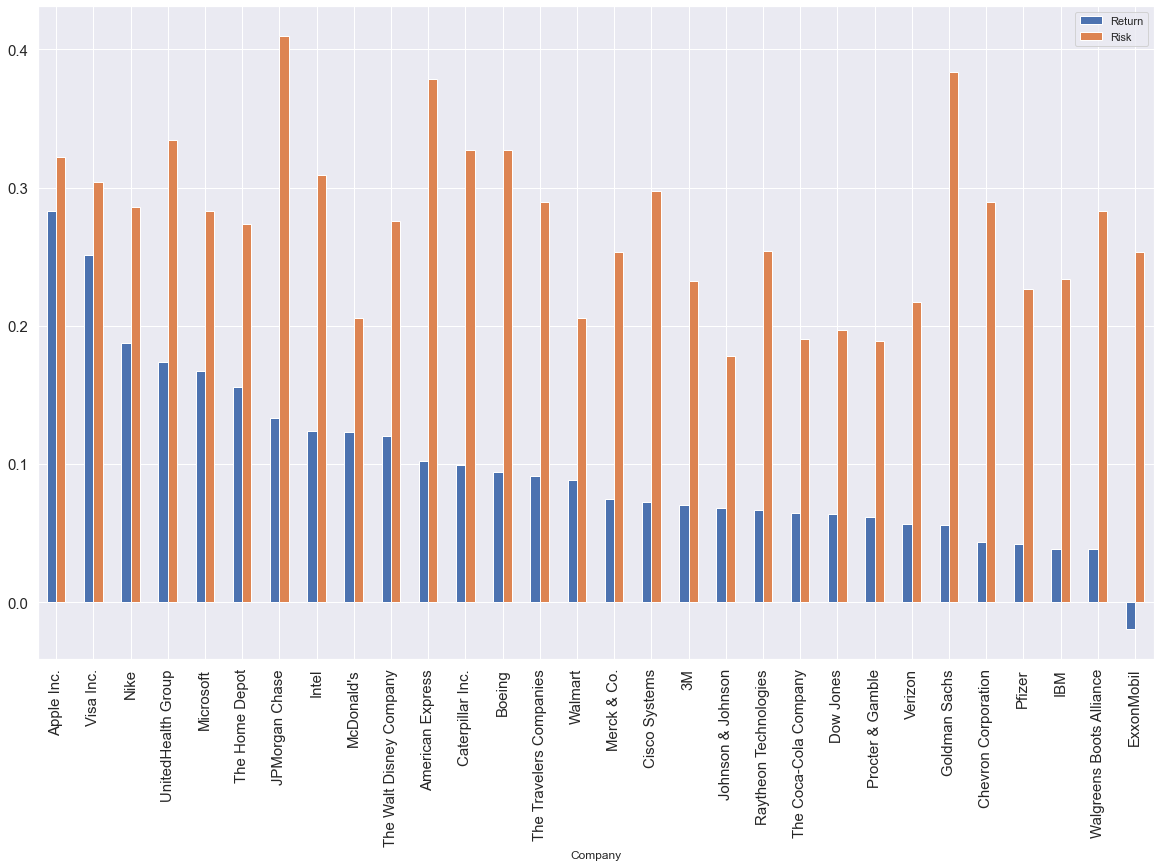

In [63]:
# Sorting by Return

summary2.sort_values(by = 'Return', ascending = False).plot(kind = 'bar', figsize = (20, 12), fontsize = 15)
plt.show()

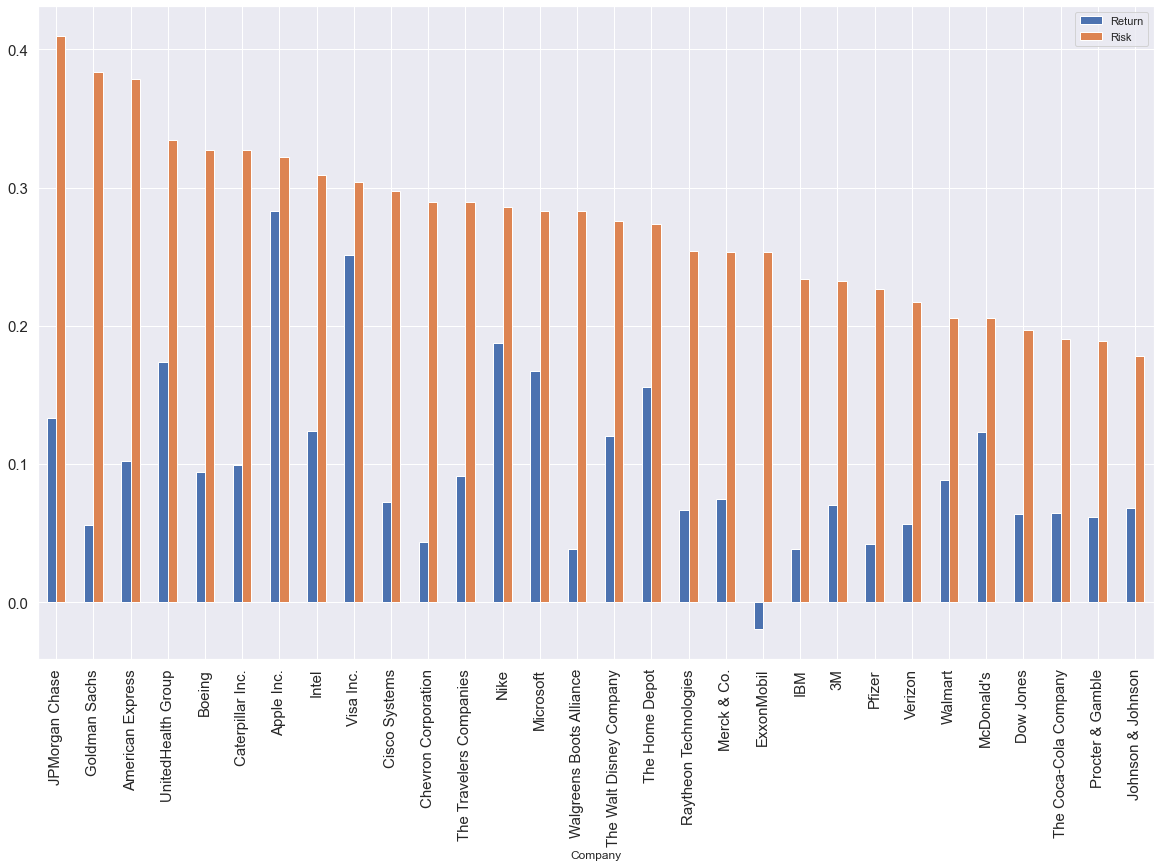

In [64]:
# Sorting by Risk

summary2.sort_values(by = 'Risk', ascending = False).plot(kind = 'bar', figsize = (20, 12), fontsize = 15)
plt.show()

In [66]:
# Creating a scatter plot
# replacing the index
summary2.set_index('Ticker', inplace = True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


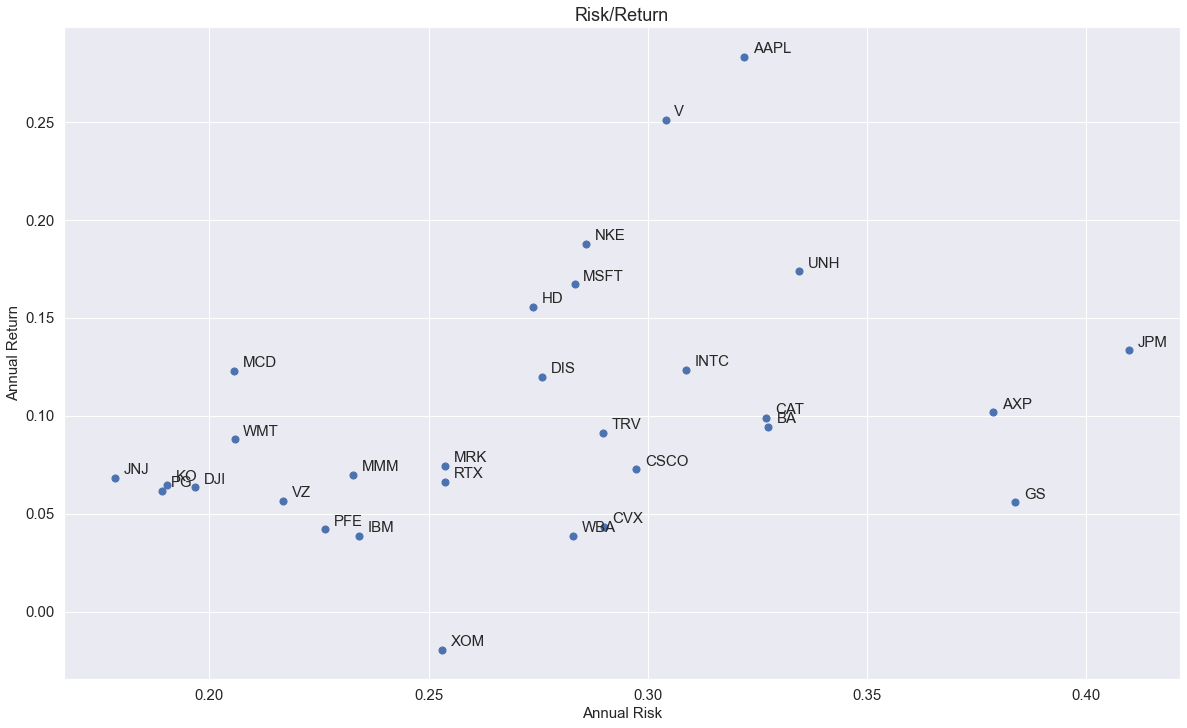

In [70]:
summary2.plot(kind = 'scatter', x = 'Risk', y = 'Return', figsize = (20, 12), s=50, fontsize = 15)
for i in summary2.index:
    plt.annotate(i, xy = (summary2.loc[i, 'Risk']+0.002, summary2.loc[i, 'Return']+0.002), size = 15)
plt.title('Risk/Return', fontsize = 18)
plt.xlabel('Annual Risk', fontsize = 15)
plt.ylabel('Annual Return', fontsize = 15)
plt.show()

In [71]:
ret

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007-01-04,0.02220,-0.00729,0.00404,-0.00262,0.02633,-0.00972,0.00789,nan,-0.00932,-0.01217,0.01069,0.04029,0.01250,0.00250,0.00041,...,-0.00396,0.02476,-0.00167,0.01024,0.00342,-0.00759,0.00096,-0.00840,0.00647,nan,0.00555,0.00195,0.00484,-0.01876,0.00049
2007-01-05,-0.00712,-0.01318,-0.00424,-0.01279,0.00035,0.00384,-0.00812,nan,0.00101,-0.01923,-0.00905,-0.00331,-0.00907,-0.00830,-0.00700,...,-0.00680,-0.01796,-0.00570,0.00162,-0.00303,-0.00859,-0.00302,-0.01299,-0.00680,nan,-0.01709,-0.01430,-0.00816,0.00715,-0.00662
2007-01-08,0.00494,0.00947,-0.00236,0.00116,0.00562,0.01276,0.00907,nan,0.02351,-0.00754,0.01519,-0.00427,-0.00165,0.00335,0.00642,...,0.00220,-0.00023,0.00978,-0.00304,-0.00532,0.00220,0.00814,-0.00744,0.01465,nan,-0.01525,0.00418,-0.00823,-0.00806,0.00206
2007-01-09,0.08307,-0.00637,-0.01057,0.00547,-0.00559,-0.01148,-0.00145,nan,0.00172,-0.00430,0.01183,0.00095,-0.00376,-0.00417,0.00082,...,0.00116,-0.00926,0.00100,0.01248,0.00038,-0.00251,-0.01139,-0.00250,-0.01200,nan,0.00407,0.00525,0.00830,-0.00771,-0.00055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,0.10033,0.21882,0.20886,0.10332,0.11561,0.22741,0.14412,0.07111,0.13803,0.13751,0.11301,0.05688,0.07234,0.11894,0.05032,...,0.12599,0.03991,0.09090,0.15175,0.04247,0.05701,0.15757,0.06089,0.12799,0.13843,-0.00636,0.03761,0.00656,0.12687,0.11365
2020-03-25,-0.00551,0.07281,0.24319,0.03286,-0.02409,0.04087,0.02660,0.06709,0.00996,-0.01602,0.00351,-0.02176,0.00185,0.03732,0.05475,...,-0.00889,-0.01202,-0.00957,0.09235,0.00168,-0.02276,0.10869,-0.01664,0.06683,0.04692,-0.00100,-0.08420,-0.04894,0.05220,0.02394
2020-03-26,0.05262,0.03460,0.13747,0.05570,0.07725,0.10264,0.04596,-0.02304,0.06872,0.07400,0.06651,0.08350,0.06005,0.06966,0.06441,...,0.03527,0.07784,0.06255,0.06695,0.06723,0.06401,0.08785,0.07041,0.08913,0.04389,0.07209,0.10208,0.00384,0.04103,0.06375


In [72]:
corr_matrix = ret.corr()
corr_matrix

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
AAPL,1.00000,0.48004,0.43809,0.48723,0.52535,0.44905,0.46858,0.63135,0.47669,0.46333,0.49442,0.52896,0.37452,0.45540,0.35893,...,0.47901,0.34490,0.52801,0.43608,0.39251,0.36339,0.49801,0.42639,0.39067,0.50087,0.35547,0.35835,0.32245,0.44055,0.62193
AXP,0.48004,1.00000,0.55014,0.59598,0.55223,0.57306,0.62793,0.58507,0.68146,0.60288,0.51313,0.54637,0.46552,0.72571,0.44279,...,0.58693,0.44536,0.55300,0.53085,0.51458,0.46951,0.63266,0.60463,0.46334,0.60833,0.46211,0.39634,0.37209,0.54393,0.77136
BA,0.43809,0.55014,1.00000,0.55400,0.48575,0.57166,0.56612,0.50237,0.50192,0.52770,0.50334,0.49391,0.45590,0.48608,0.45404,...,0.54290,0.38240,0.50164,0.49460,0.44379,0.41792,0.68081,0.46549,0.43746,0.47083,0.37806,0.36882,0.33181,0.56223,0.73643
CAT,0.48723,0.59598,0.55400,1.00000,0.56840,0.61725,0.58537,0.75962,0.56573,0.52694,0.54126,0.56037,0.46074,0.54719,0.42325,...,0.65202,0.39322,0.54284,0.49524,0.48050,0.41156,0.65522,0.47339,0.39911,0.50112,0.43371,0.40260,0.35727,0.61724,0.76020
CSCO,0.52535,0.55223,0.48575,0.56840,1.00000,0.53360,0.58301,0.59676,0.54638,0.53123,0.58277,0.61633,0.49956,0.53100,0.43971,...,0.59042,0.43659,0.62195,0.50238,0.49182,0.47647,0.58776,0.48242,0.40525,0.51097,0.45948,0.42715,0.41685,0.55070,0.72789
CVX,0.44905,0.57306,0.57166,0.61725,0.53360,1.00000,0.60003,0.54123,0.55698,0.53148,0.53946,0.52639,0.53527,0.52849,0.49789,...,0.58551,0.48709,0.55232,0.47320,0.51383,0.49010,0.65290,0.57073,0.49740,0.50917,0.47504,0.39013,0.36002,0.85069,0.78718
DIS,0.46858,0.62793,0.56612,0.58537,0.58301,0.60003,1.00000,0.52425,0.58460,0.59552,0.55556,0.54201,0.51634,0.58005,0.50733,...,0.61155,0.47679,0.56801,0.55190,0.52606,0.53083,0.64985,0.54339,0.47545,0.53192,0.48768,0.44278,0.42317,0.60445,0.78162
DOW,0.63135,0.58507,0.50237,0.75962,0.59676,0.54123,0.52425,1.00000,0.66035,0.56854,0.62955,0.59364,0.46998,0.69256,0.48721,...,0.55125,0.43941,0.63553,0.60275,0.49443,0.49525,0.58998,0.56586,0.50561,0.61357,0.45178,0.43149,0.48974,0.70508,0.71479
GS,0.47669,0.68146,0.50192,0.56573,0.54638,0.55698,0.58460,0.66035,1.00000,0.56618,0.51889,0.50982,0.44260,0.76270,0.39332,...,0.55003,0.40263,0.52492,0.46253,0.47640,0.40480,0.57216,0.56998,0.45533,0.55334,0.42001,0.38985,0.34945,0.53344,0.72983
HD,0.46333,0.60288,0.52770,0.52694,0.53123,0.53148,0.59552,0.56854,0.56618,1.00000,0.54190,0.55016,0.48062,0.58359,0.47644,...,0.57126,0.41896,0.53546,0.55978,0.49890,0.48138,0.60315,0.55238,0.46043,0.53506,0.48042,0.44429,0.49033,0.51204,0.74841


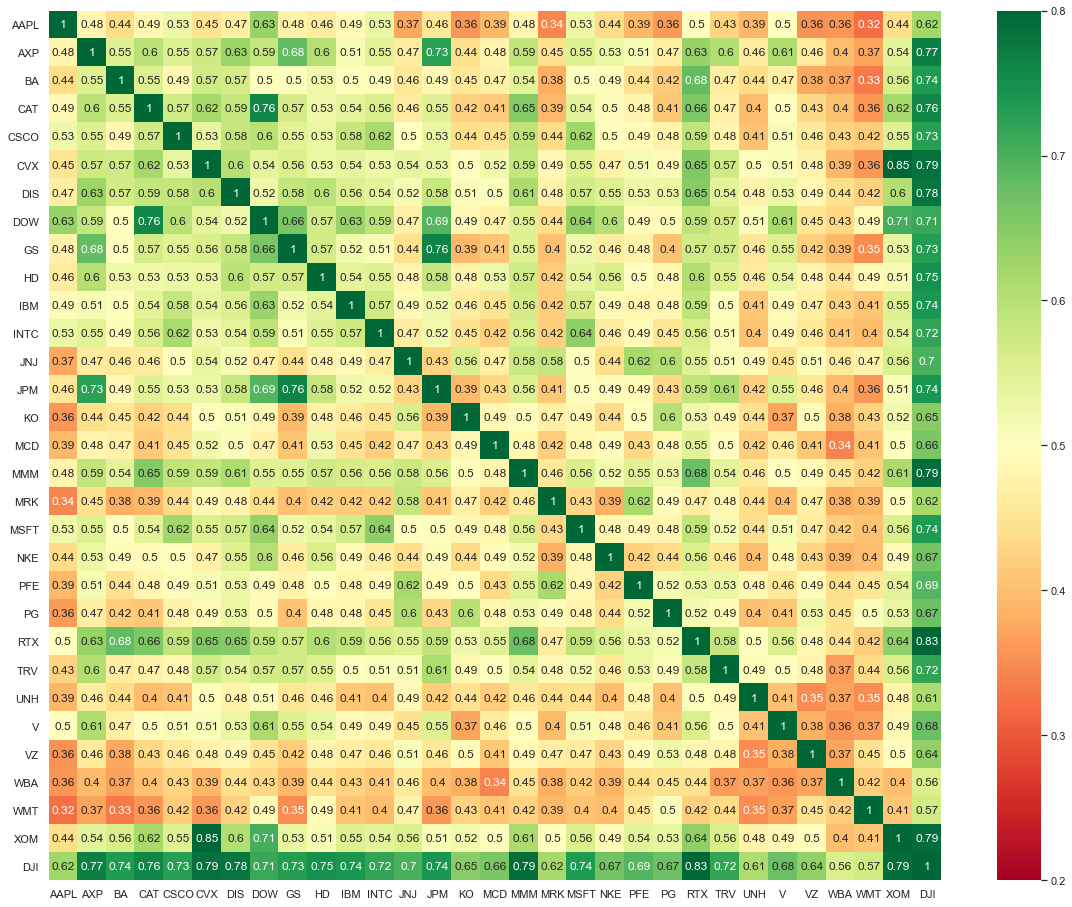

In [73]:
plt.figure(figsize = (20, 16))
sns.heatmap(corr_matrix, cmap = "RdYlGn", annot = True, vmin = 0.2, vmax = 0.8)
plt.show()

## Index Tracking 

Here we track the Dow Jones Index with a tracking portfolio of only 10 stocks:- 

1) These 10 stocks are first selected based on the lowest individual tracking error (TE)

2) After that we identify the portfolio that best tracks the index in a training period (We choose 2017-18).
We forward test for the data in 2019

3) Also we find the optimal weights of the stocks in the tracking portfolio that minimizes the TE.

In [75]:
df2 = df.loc['2017':'2018'].copy()
df2

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.15000,75.35000,156.97000,93.99000,30.54000,117.85000,106.08000,nan,241.57001,134.31000,167.19000,36.60000,115.84000,87.23000,41.80000,...,178.05000,60.15000,62.58000,51.98000,33.00000,84.20000,69.74827,120.90000,161.45000,79.50000,54.58000,82.96000,68.66000,90.89000,19881.75977
2017-01-04,116.02000,76.26000,158.62000,93.57000,30.10000,117.82000,107.44000,nan,243.13000,135.50000,169.25999,36.41000,115.65000,86.91000,41.65000,...,178.32001,60.13000,62.30000,53.07000,33.29000,84.50000,69.79232,120.25000,161.91000,80.15000,54.52000,82.98000,69.06000,89.89000,19942.16016
2017-01-05,116.61000,75.32000,158.71001,93.00000,30.17000,117.31000,107.38000,nan,241.32001,133.89999,168.70000,36.35000,116.86000,86.11000,41.75000,...,177.71001,60.11000,62.30000,53.06000,33.61000,85.06000,70.07552,118.33000,162.17999,81.09000,54.64000,83.03000,69.21000,88.55000,19899.28906
2017-01-06,117.91000,75.47000,159.10001,93.04000,30.23000,116.84000,108.98000,nan,244.89999,133.53000,169.53000,36.48000,116.30000,86.12000,41.74000,...,178.23000,60.27000,62.84000,53.91000,33.48000,85.03000,70.83071,118.27000,162.41000,82.21000,53.26000,83.10000,68.26000,88.50000,19963.80078
2017-01-09,118.99000,75.86000,158.32001,92.37000,30.18000,115.84000,108.36000,nan,242.89000,134.31000,167.64999,36.61000,116.28000,86.18000,41.32000,...,177.27000,61.10000,62.64000,53.38000,33.47000,84.40000,70.16992,117.32000,161.95000,81.75000,52.68000,82.55000,68.71000,87.04000,19887.38086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,146.83000,89.50000,294.16000,116.95000,40.28000,100.99000,100.35000,nan,156.35001,158.14000,107.57000,43.59000,122.84000,92.14000,45.96000,...,178.62000,71.15000,94.13000,68.10000,40.55000,87.36000,64.22907,112.63000,232.94000,121.73000,53.05000,65.26000,85.82000,65.51000,21792.19922
2018-12-26,157.17000,93.84000,313.92999,124.76000,42.47000,107.39000,105.83000,nan,162.92999,168.28000,111.39000,46.19000,126.71000,95.96000,46.94000,...,186.25999,74.00000,100.56000,73.01000,42.19000,90.09000,66.71491,117.17000,243.35001,130.23000,54.44000,67.72000,90.41000,68.64000,22878.44922
2018-12-27,156.14999,94.68000,317.14001,126.67000,42.91000,109.32000,106.52000,nan,165.41000,170.32001,113.78000,46.36000,127.41000,97.04000,47.53000,...,190.70000,75.38000,101.18000,73.67000,42.85000,92.02000,66.55759,118.67000,245.97000,132.00999,55.15000,68.36000,91.59000,68.94000,23138.82031


In [76]:
norm2 = df2.div(df2.iloc[0]).mul(100)
norm2

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,nan,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,...,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
2017-01-04,99.88807,101.20770,101.05115,99.55315,98.55926,99.97454,101.28205,nan,100.64577,100.88601,101.23811,99.48088,99.83599,99.63315,99.64115,...,100.15165,99.96675,99.55257,102.09696,100.87879,100.35630,100.06316,99.46236,100.28492,100.81761,99.89007,100.02411,100.58257,98.89977,100.30380
2017-01-05,100.39604,99.96019,101.10850,98.94670,98.78847,99.54179,101.22549,nan,99.89651,99.69473,100.90316,99.31694,100.88053,98.71603,99.88038,...,99.80904,99.93350,99.55257,102.07773,101.84849,101.02138,100.46918,97.87428,100.45215,102.00000,100.10993,100.08438,100.80104,97.42546,100.08817
2017-01-06,101.51528,100.15926,101.35695,98.98926,98.98493,99.14298,102.73379,nan,101.37848,99.41925,101.39960,99.67213,100.39711,98.72750,99.85647,...,100.10109,100.19950,100.41547,103.71297,101.45454,100.98575,101.55193,97.82464,100.59462,103.40880,97.58153,100.16876,99.41742,97.37045,100.41264
2017-01-09,102.44511,100.67684,100.86004,98.27642,98.82122,98.29444,102.14932,nan,100.54642,100.00000,100.27513,100.02733,100.37984,98.79628,98.85168,...,99.56192,101.57938,100.09587,102.69335,101.42425,100.23754,100.60454,97.03887,100.30969,102.83019,96.51887,99.50579,100.07282,95.76411,100.02827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,126.41412,118.77903,187.39887,124.42813,131.89259,85.69368,94.59841,nan,64.72244,117.74254,64.33997,119.09837,106.04282,105.62879,109.95215,...,100.32013,118.28761,150.41546,131.01193,122.87879,103.75297,92.08698,93.15963,144.27997,153.11950,97.19677,78.66442,124.99271,72.07614,109.60901
2018-12-26,135.31640,124.53882,199.99362,132.73753,139.06352,91.12431,99.76433,nan,67.44628,125.29224,66.62480,126.20219,109.38364,110.00802,112.29665,...,104.61106,123.02577,160.69031,140.45787,127.84848,106.99525,95.65099,96.91480,150.72779,163.81132,99.74349,81.62970,131.67783,75.51986,115.07256
2018-12-27,134.43822,125.65362,202.03861,134.76966,140.50425,92.76199,100.41478,nan,68.47291,126.81112,68.05431,126.66667,109.98792,111.24613,113.70813,...,107.10474,125.32003,161.68104,141.72759,129.84848,109.28741,95.42543,98.15550,152.35058,166.05031,101.04434,82.40116,133.39643,75.84993,116.38215


In [77]:
ret2 = ret.loc['2017':'2018']
ret2

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.00285,0.01714,0.00829,0.01348,0.01059,0.00127,0.01785,nan,0.00885,0.00172,0.00723,0.00910,0.00547,0.01089,0.00820,...,-0.00291,0.02174,0.00708,0.02262,0.01601,0.00143,0.01104,-0.01242,0.00881,0.01897,0.02248,0.00242,-0.00666,0.00698,0.00603
2017-01-04,-0.00112,0.01208,0.01051,-0.00447,-0.01441,-0.00025,0.01282,nan,0.00646,0.00886,0.01238,-0.00519,-0.00164,-0.00367,-0.00359,...,0.00152,-0.00033,-0.00447,0.02097,0.00879,0.00356,0.00063,-0.00538,0.00285,0.00818,-0.00110,0.00024,0.00583,-0.01100,0.00304
2017-01-05,0.00509,-0.01233,0.00057,-0.00609,0.00233,-0.00433,-0.00056,nan,-0.00744,-0.01181,-0.00331,-0.00165,0.01046,-0.00920,0.00240,...,-0.00342,-0.00033,0.00000,-0.00019,0.00961,0.00663,0.00406,-0.01597,0.00167,0.01173,0.00220,0.00060,0.00217,-0.01491,-0.00215
2017-01-06,0.01115,0.00199,0.00246,0.00043,0.00199,-0.00401,0.01490,nan,0.01484,-0.00276,0.00492,0.00358,-0.00479,0.00012,-0.00024,...,0.00293,0.00266,0.00867,0.01602,-0.00387,-0.00035,0.01078,-0.00051,0.00142,0.01381,-0.02526,0.00084,-0.01373,-0.00056,0.00324
2017-01-09,0.00916,0.00517,-0.00490,-0.00720,-0.00165,-0.00856,-0.00569,nan,-0.00821,0.00584,-0.01109,0.00356,-0.00017,0.00070,-0.01006,...,-0.00539,0.01377,-0.00318,-0.00983,-0.00030,-0.00741,-0.00933,-0.00803,-0.00283,-0.00560,-0.01089,-0.00662,0.00659,-0.01650,-0.00383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.02587,-0.02004,-0.03412,-0.02598,-0.03751,-0.03090,-0.03713,nan,-0.02312,-0.01458,-0.03038,-0.02788,-0.04099,-0.02156,-0.03384,...,-0.02792,-0.02401,-0.04174,-0.05900,-0.03291,-0.03968,-0.03880,-0.02955,-0.02266,-0.02036,-0.03405,-0.02974,-0.01503,-0.03831,-0.02910
2018-12-26,0.07042,0.04849,0.06721,0.06678,0.05437,0.06337,0.05461,nan,0.04208,0.06412,0.03551,0.05965,0.03150,0.04146,0.02132,...,0.04277,0.04006,0.06831,0.07210,0.04044,0.03125,0.03870,0.04031,0.04469,0.06983,0.02620,0.03770,0.05348,0.04778,0.04985
2018-12-27,-0.00649,0.00895,0.01023,0.01531,0.01036,0.01797,0.00652,nan,0.01522,0.01212,0.02146,0.00368,0.00552,0.01125,0.01257,...,0.02384,0.01865,0.00617,0.00904,0.01564,0.02142,-0.00236,0.01280,0.01077,0.01367,0.01304,0.00945,0.01305,0.00437,0.01138


In [79]:
# Daily return compared to DJI

ret_diff = ret2.sub(ret2.DJI, axis = 0)
ret_diff

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,...,MMM,MRK,MSFT,NKE,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.00318,0.01111,0.00226,0.00745,0.00456,-0.00476,0.01182,nan,0.00282,-0.00431,0.00120,0.00307,-0.00056,0.00486,0.00217,...,-0.00894,0.01571,0.00105,0.01659,0.00998,-0.00460,0.00501,-0.01845,0.00278,0.01294,0.01645,-0.00361,-0.01268,0.00095,0.00000
2017-01-04,-0.00416,0.00904,0.00747,-0.00751,-0.01745,-0.00329,0.00978,nan,0.00342,0.00582,0.00934,-0.00823,-0.00468,-0.00671,-0.00663,...,-0.00152,-0.00337,-0.00751,0.01793,0.00575,0.00053,-0.00241,-0.00841,-0.00019,0.00514,-0.00414,-0.00280,0.00279,-0.01404,0.00000
2017-01-05,0.00724,-0.01018,0.00272,-0.00394,0.00448,-0.00218,0.00159,nan,-0.00529,-0.00966,-0.00116,0.00050,0.01261,-0.00706,0.00455,...,-0.00127,0.00182,0.00215,0.00196,0.01176,0.00878,0.00621,-0.01382,0.00382,0.01388,0.00435,0.00275,0.00432,-0.01276,0.00000
2017-01-06,0.00791,-0.00125,-0.00078,-0.00281,-0.00125,-0.00725,0.01166,nan,0.01159,-0.00601,0.00168,0.00033,-0.00803,-0.00313,-0.00348,...,-0.00032,-0.00058,0.00543,0.01278,-0.00711,-0.00359,0.00753,-0.00375,-0.00182,0.01057,-0.02850,-0.00240,-0.01697,-0.00381,0.00000
2017-01-09,0.01299,0.00900,-0.00107,-0.00337,0.00217,-0.00473,-0.00186,nan,-0.00438,0.00967,-0.00726,0.00739,0.00366,0.00452,-0.00623,...,-0.00156,0.01760,0.00065,-0.00600,0.00353,-0.00358,-0.00550,-0.00420,0.00100,-0.00177,-0.00706,-0.00279,0.01042,-0.01267,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.00323,0.00906,-0.00502,0.00312,-0.00841,-0.00180,-0.00803,nan,0.00598,0.01452,-0.00128,0.00122,-0.01189,0.00754,-0.00474,...,0.00118,0.00509,-0.01264,-0.02990,-0.00381,-0.01058,-0.00970,-0.00045,0.00644,0.00874,-0.00495,-0.00063,0.01407,-0.00921,0.00000
2018-12-26,0.02058,-0.00135,0.01736,0.01693,0.00452,0.01353,0.00476,nan,-0.00776,0.01427,-0.01433,0.00980,-0.01834,-0.00839,-0.02852,...,-0.00707,-0.00979,0.01846,0.02225,-0.00940,-0.01860,-0.01114,-0.00954,-0.00516,0.01998,-0.02364,-0.01215,0.00364,-0.00207,0.00000
2018-12-27,-0.01787,-0.00243,-0.00116,0.00393,-0.00102,0.00659,-0.00486,nan,0.00384,0.00074,0.01008,-0.00770,-0.00586,-0.00013,0.00119,...,0.01246,0.00727,-0.00522,-0.00234,0.00426,0.01004,-0.01374,0.00142,-0.00061,0.00229,0.00166,-0.00193,0.00167,-0.00701,0.00000


In [81]:
# Average mean and std of aeach of the 30 stocks compared to DJI

ret_diff.agg(['mean', 'std']).T

,mean,std
AAPL,0.00036,0.01158
AXP,0.00021,0.00836
BA,0.00121,0.01147
CAT,0.00041,0.01236
CSCO,0.00045,0.00952
CVX,-0.00045,0.00994
DIS,-0.00020,0.00963
DOW,nan,nan
GS,-0.00098,0.01000
HD,0.00020,0.00848


In [88]:
# Annualizing the stocks

def tracking_ann(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Premium'] = summary['mean'] * 252
    summary['T.E'] = summary['std'] * np.sqrt(252)
    summary.drop(columns = ['mean', 'std'], inplace = True)
    return summary

In [89]:
tracking = tracking_ann(ret_diff)
tracking

,Premium,T.E
AAPL,0.09115,0.18377
AXP,0.05301,0.13264
BA,0.30601,0.18205
CAT,0.10301,0.19626
CSCO,0.11235,0.15114
CVX,-0.11217,0.15787
DIS,-0.05000,0.15291
DOW,nan,nan
GS,-0.24671,0.15878
HD,0.04928,0.13463


In [92]:
# noa = no. of assets (for top 10 stocks)
noa = 10
tracking_stocks = tracking.sort_values(by = 'T.E').index[:noa + 1]
tracking_stocks

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM',
       'TRV'],
      dtype='object')

In [94]:
norm_track = norm2.loc[:, tracking_stocks]
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV
Date,,,,,,,,,,,
2017-01-03,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
2017-01-04,100.30380,100.15165,99.63315,100.87879,100.81761,101.20770,100.06316,99.64115,100.88601,98.89977,99.46236
2017-01-05,100.08817,99.80904,98.71603,101.84849,102.00000,99.96019,100.46918,99.88038,99.69473,97.42546,97.87428
2017-01-06,100.41264,100.10109,98.72750,101.45454,103.40880,100.15926,101.55193,99.85647,99.41925,97.37045,97.82464
2017-01-09,100.02827,99.56192,98.79628,101.42425,102.83019,100.67684,100.60454,98.85168,100.00000,95.76411,97.03887
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.60901,100.32013,105.62879,122.87879,153.11950,118.77903,92.08698,109.95215,117.74254,72.07614,93.15963
2018-12-26,115.07256,104.61106,110.00802,127.84848,163.81132,124.53882,95.65099,112.29665,125.29224,75.51986,96.91480
2018-12-27,116.38215,107.10474,111.24613,129.84848,166.05031,125.65362,95.42543,113.70813,126.81112,75.84993,98.15550


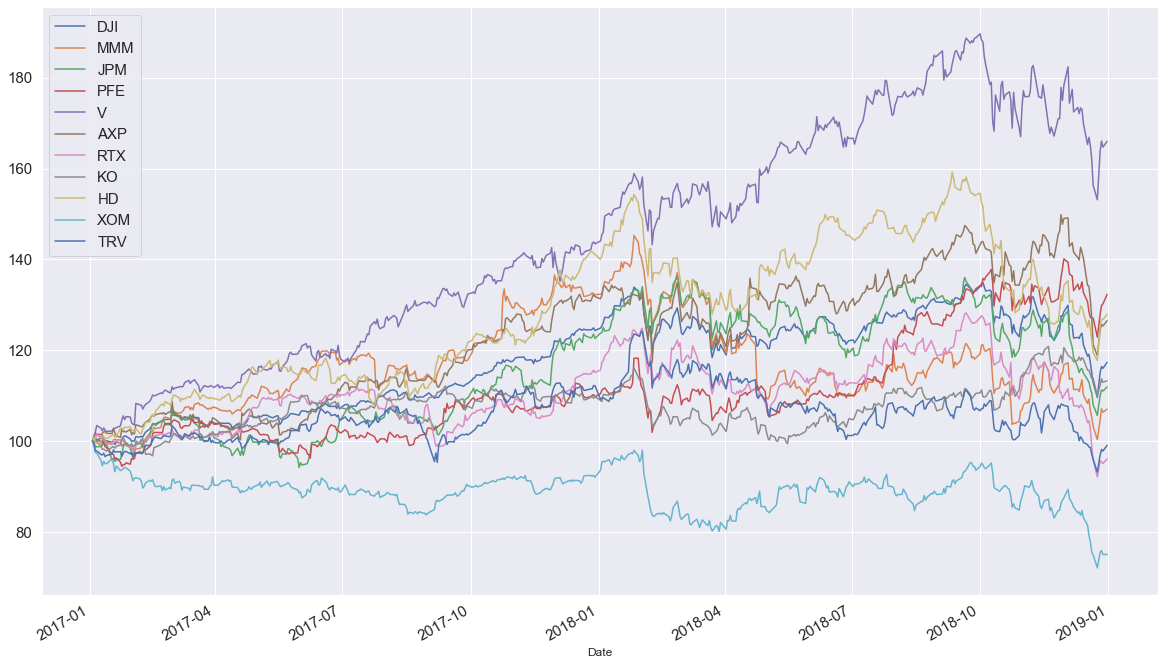

In [96]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15, loc = 2)
plt.show()

In [97]:
#  dropping the dow-jones stock
tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

## Tracking Portfolio

### The Simple Tracking/Equally Weighed Portfolio

In [98]:
eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [102]:
ret2.loc[:, tracking_stocks].dot(eweights)

Date
2017-01-03    0.00756
2017-01-04    0.00164
2017-01-05   -0.00398
2017-01-06    0.00217
2017-01-09   -0.00435
               ...   
2018-12-24   -0.02779
2018-12-26    0.04552
2018-12-27    0.01129
2018-12-28   -0.00437
2018-12-31    0.00840
Length: 502, dtype: float64

In [103]:
# calculate portfolio returns (based on weights), same as above
def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [104]:
# minimize tracking error of tracking portfolio
def tracking_error(weights):
    return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [105]:
tracking_error(eweights)

0.04120933686266803

In [106]:
# Calculating normalized equally weighed(ew) portfolio
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04   100.16414
2017-01-05    99.76513
2017-01-06    99.98142
2017-01-09    99.54655
2017-01-10    99.48280
                ...   
2018-12-24   108.29800
2018-12-26   113.22802
2018-12-27   114.50593
2018-12-28   114.00535
2018-12-31   114.96335
Length: 501, dtype: float64

In [107]:
norm_track['EW_Port'] = ew_port
norm_track.iloc[0, -1] = 100

In [108]:
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
2017-01-04,100.30380,100.15165,99.63315,100.87879,100.81761,101.20770,100.06316,99.64115,100.88601,98.89977,99.46236,100.16414
2017-01-05,100.08817,99.80904,98.71603,101.84849,102.00000,99.96019,100.46918,99.88038,99.69473,97.42546,97.87428,99.76513
2017-01-06,100.41264,100.10109,98.72750,101.45454,103.40880,100.15926,101.55193,99.85647,99.41925,97.37045,97.82464,99.98142
2017-01-09,100.02827,99.56192,98.79628,101.42425,102.83019,100.67684,100.60454,98.85168,100.00000,95.76411,97.03887,99.54655
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.60901,100.32013,105.62879,122.87879,153.11950,118.77903,92.08698,109.95215,117.74254,72.07614,93.15963,108.29800
2018-12-26,115.07256,104.61106,110.00802,127.84848,163.81132,124.53882,95.65099,112.29665,125.29224,75.51986,96.91480,113.22802
2018-12-27,116.38215,107.10474,111.24613,129.84848,166.05031,125.65362,95.42543,113.70813,126.81112,75.84993,98.15550,114.50593


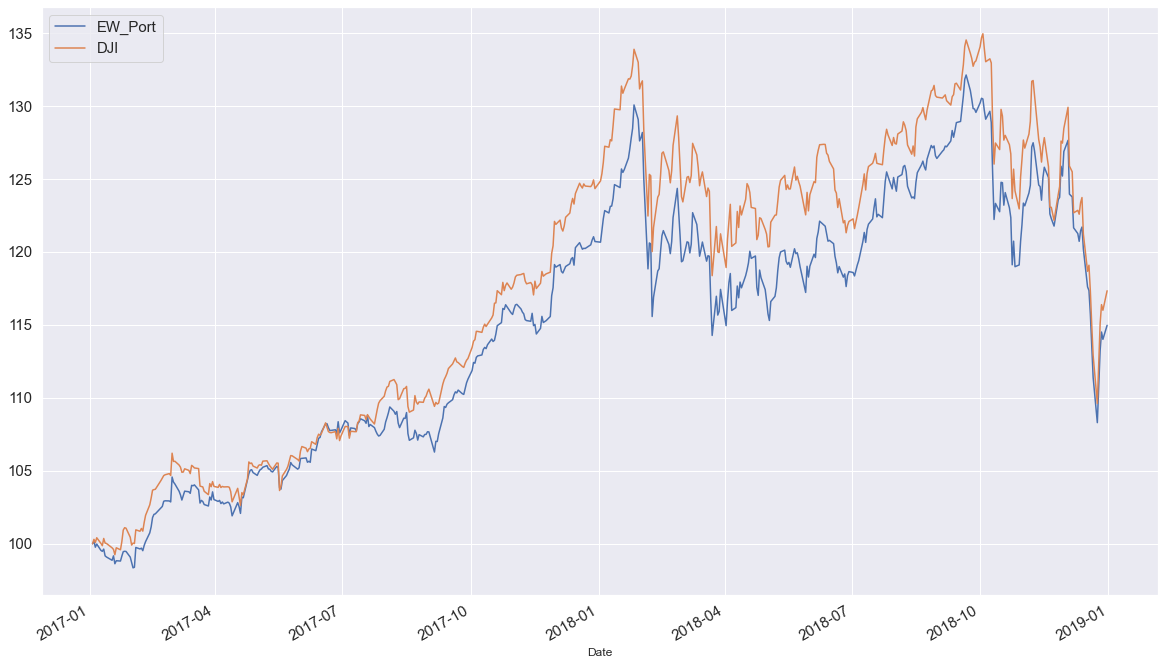

In [110]:
norm_track[['EW_Port', 'DJI']].plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15, loc = 2)
plt.show()

## Finding the optimal tracking portfolio 

### Here we find the optimal weights for 10 stocks. This is a pretty complex optimization, we use quadratic optimization from scipy library.

In [114]:
import scipy.optimize as sco

In [122]:
# constraints: sum of weights must equal to 1, i.e sum of weights - 1 = 0
cons = ({'type':'eq', 'fun': lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [116]:
# putting the bounds for our weights, all weights should be between (0, 1)
bnds = tuple((0, 1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [123]:
# running optimization on the fn to be minimized
opt = sco.minimize(tracking_error, eweights, method = 'SLSQP', bounds = bnds, constraints = cons)
opt

# here our tracking error, fun = 0.03796 is better than equally weighed portfolio

     fun: 0.03796156173824401
     jac: array([0.00744084, 0.00756334, 0.0074499 , 0.0074106 , 0.00737157,
       0.00733688, 0.00725428, 0.00753916, 0.00737198, 0.00768488])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [125]:
# getting those optimal weights

optimal_wts = opt['x']
optimal_wts

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [128]:
# creating a corresponding series (of wts and tickers)
pd.Series(index = tracking_stocks, data = optimal_wts)

MMM   0.13102
JPM   0.14452
PFE   0.05985
V     0.16765
AXP   0.04029
RTX   0.10055
KO    0.07688
HD    0.10957
XOM   0.11460
TRV   0.05508
dtype: float64

In [129]:
# calculating the daily return of our optimal portfolio
opt_port = port_ret(optimal_wts)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04   100.12531
2017-01-05    99.82267
2017-01-06   100.14552
2017-01-09    99.66909
2017-01-10    99.52640
                ...   
2018-12-24   109.46045
2018-12-26   114.70669
2018-12-27   116.03746
2018-12-28   115.45502
2018-12-31   116.34559
Length: 501, dtype: float64

In [130]:
norm_track['Opt_Port'] = opt_port
norm_track.iloc[0, -1] = 100
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
2017-01-04,100.30380,100.15165,99.63315,100.87879,100.81761,101.20770,100.06316,99.64115,100.88601,98.89977,99.46236,100.16414,100.12531
2017-01-05,100.08817,99.80904,98.71603,101.84849,102.00000,99.96019,100.46918,99.88038,99.69473,97.42546,97.87428,99.76513,99.82267
2017-01-06,100.41264,100.10109,98.72750,101.45454,103.40880,100.15926,101.55193,99.85647,99.41925,97.37045,97.82464,99.98142,100.14552
2017-01-09,100.02827,99.56192,98.79628,101.42425,102.83019,100.67684,100.60454,98.85168,100.00000,95.76411,97.03887,99.54655,99.66909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.60901,100.32013,105.62879,122.87879,153.11950,118.77903,92.08698,109.95215,117.74254,72.07614,93.15963,108.29800,109.46045
2018-12-26,115.07256,104.61106,110.00802,127.84848,163.81132,124.53882,95.65099,112.29665,125.29224,75.51986,96.91480,113.22802,114.70669
2018-12-27,116.38215,107.10474,111.24613,129.84848,166.05031,125.65362,95.42543,113.70813,126.81112,75.84993,98.15550,114.50593,116.03746


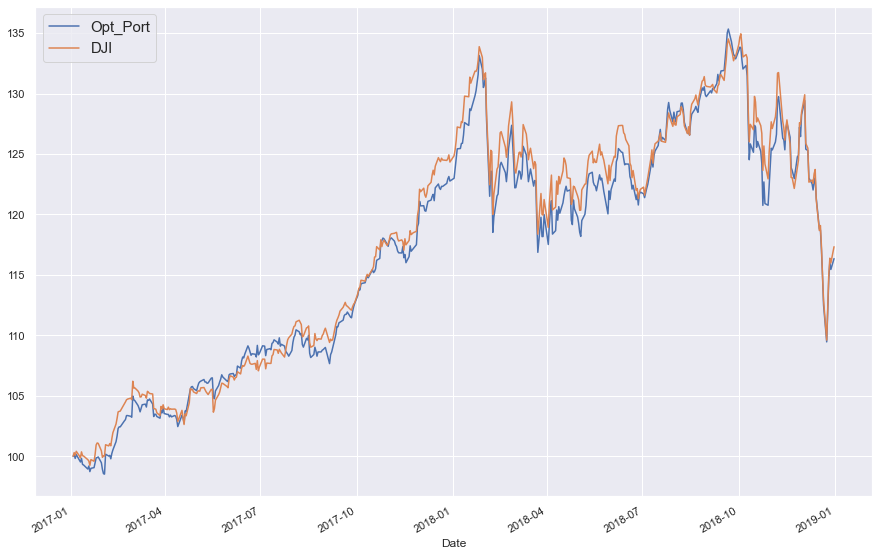

In [132]:
norm_track[['Opt_Port', 'DJI']].plot(figsize = (15, 10))
plt.legend(fontsize = 15, loc = 2)
plt.show()

In [134]:
summary_ann(norm_track[['Opt_Port', 'EW_Port', 'DJI']].pct_change())

,Return,Risk
Opt_Port,0.08488,0.13187
EW_Port,0.07826,0.12714
DJI,0.08956,0.13521


## Forward testing on data of 2019 (which is our test data in ML lingo)

In [142]:
# Here we automate and scale the process of tracking errors and visualizing tracking portfolios and the index

def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)

In [143]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = 'Portfolio'
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12, 8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()


In [144]:
tracking_error_gen(ret, tracking_stocks, optimal_wts, 'DJI', '2017-01-01', '2018-12-31')

0.03796156173824401

In [145]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_wts, 'DJI', '2019-01-01', '2019-12-31')
forward_te

0.04784002353318222

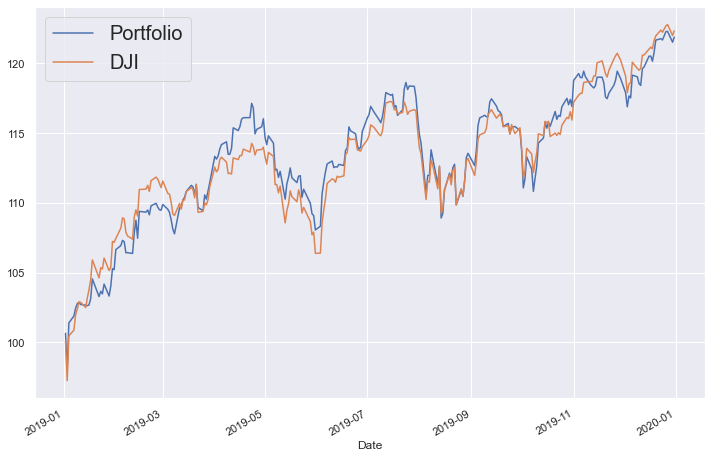

In [147]:
visual(ret, tracking_stocks, optimal_wts, 'DJI', '2019-01-01', '2019-12-31')

# hence our tracking portfolio seems to work

## Calculating tracking error on random portfolios 

In [148]:
# we select random stocks and also generate random weights for those stocks

bucket = df.columns.drop(['DJI', 'DOW'])
bucket

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [157]:
# draw random samples
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_stocks

array(['GS', 'XOM', 'CVX', 'VZ', 'HD', 'WBA', 'JPM', 'RTX', 'JNJ', 'TRV'],
      dtype=object)

In [156]:
# creating random weights
np.random.seed(123)
random_nums = np.random.random(noa)
random_wts = random_nums / random_nums.sum()
random_wts

array([0.12798052, 0.05257987, 0.04168536, 0.1013075 , 0.13220688,
       0.07774843, 0.18022149, 0.1258417 , 0.08837421, 0.07205402])

In [158]:
# tracking error of our random portfolio
tracking_error_gen(ret, random_stocks, random_wts, 'DJI', '2019-01-01', '2019-12-31')

0.05229935224688196

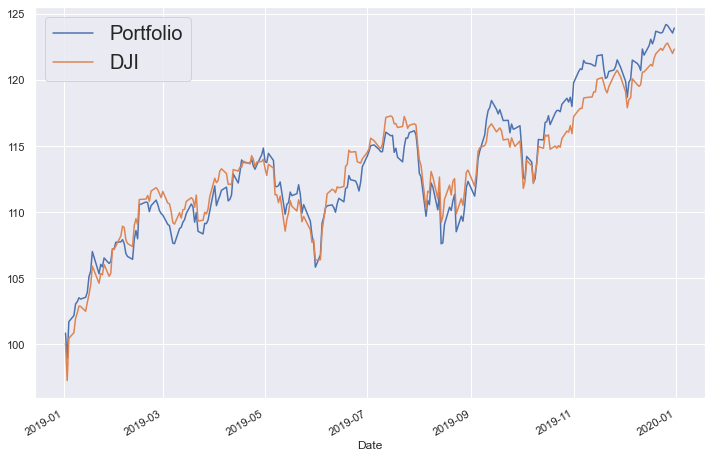

In [159]:
visual(ret, random_stocks, random_wts, 'DJI', '2019-01-01', '2019-12-31')

In [160]:
# Creating 10,000 random portfolios

tes = np.empty(10000)
np.empty(123)
for i in range(10000):
    random_nums = np.random.random(noa)
    random_wts = random_nums / random_nums.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)

    tes[i] = tracking_error_gen(ret, random_stocks, random_wts, 'DJI', '2019-01-01', '2019-12-31')
    

In [161]:
(tes < forward_te).mean()

0.0657

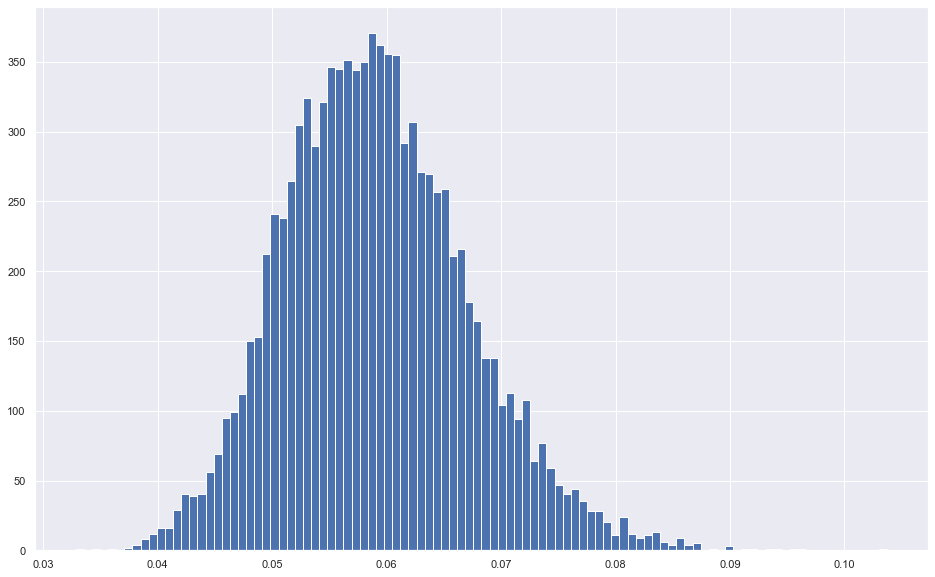

In [162]:
plt.figure(figsize = (16, 10))
plt.hist(tes, bins = 100)
plt.show()

In [163]:
####################################################      THE END      ######################################################